In [1]:
# # Default style
# %matplotlib inline
# from matplotlib import style
# style.use('fivethirtyeight')

#Import the dependences
import numpy as np
import pandas as pd
import datetime 

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Python SQL toolkit and Object Relational Mapper (ORM)
# import sqlalchemy
# from sqlalchemy.ext.automap import automap_base
# from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text, func, DateTime, Column

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///starbucks_store_locations.sqlite")

In [4]:
 # Create the inspector and connect it to the engine (check what we have in our database)
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

starbucks_store_locations
--------
store_number TEXT
city TEXT
state_province TEXT
country TEXT
longitude FLOAT
latitude FLOAT
region TEXT



In [5]:
# RAW SQL / Pandas
conn = engine.connect() 

In [6]:
# check the data in the table station (just for viewing)
query = text("""Select * FROM starbucks_store_locations LIMIT 2""")
df = pd.read_sql(query, con=conn)
df

,store_number,city,state_province,country,longitude,latitude,region
0,47370-257954,Andorra la Vella,7,AD,1.53,42.51,Europe
1,22331-212325,Ajman,AJ,AE,55.47,25.42,Asia


In [12]:
query = text("""SELECT
                state_province,
                COUNT (store_number) AS store_count
           FROM
                starbucks_store_locations
           WHERE
                country = 'US'
           GROUP BY
                state_province
           ORDER BY
                state_province ASC;""")
df1 = pd.read_sql(query, con=conn)
df1

,state_province,store_count
0,AK,49
1,AL,85
2,AR,55
3,AZ,488
4,CA,2821
5,CO,481
6,CT,123
7,DC,91
8,DE,25
9,FL,694


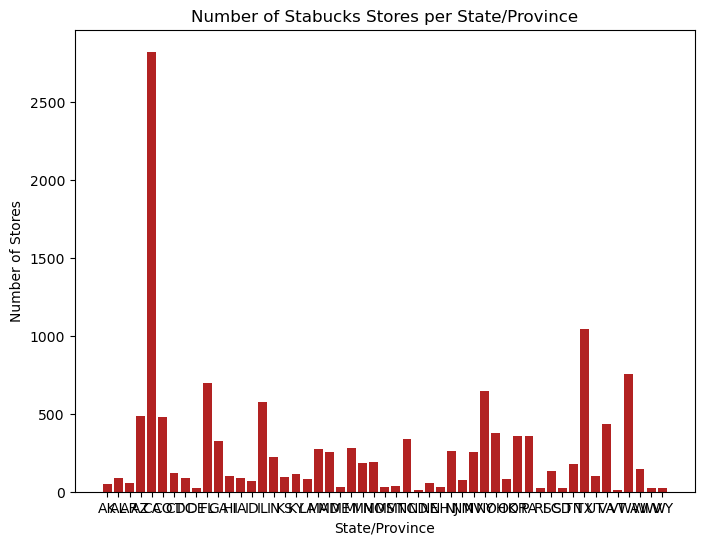

In [18]:
plt.figure(figsize=(8, 6))
plt.bar(df1.state_province, df1.store_count, color="firebrick")
plt.title("Number of Starbucks Stores per State/Province")
plt.xlabel("State/Province")
plt.ylabel("Number of Stores")
plt.show()

In [26]:
query = text("""SELECT
                region,
                country,
                COUNT(store_number) AS store_count
           FROM
                starbucks_store_locations
           GROUP BY
                country
           ORDER BY
               region ASC;""")
df2 = pd.read_sql(query, con=conn)
df2

,region,country,store_count
0,Africa,EG,18
1,Africa,MA,9
2,Africa,ZA,3
3,Americas,AR,108
4,Americas,AW,3
...,...,...,...
68,Europe,RU,109
69,Europe,SE,18
70,Europe,SK,3
71,Oceania,AU,22


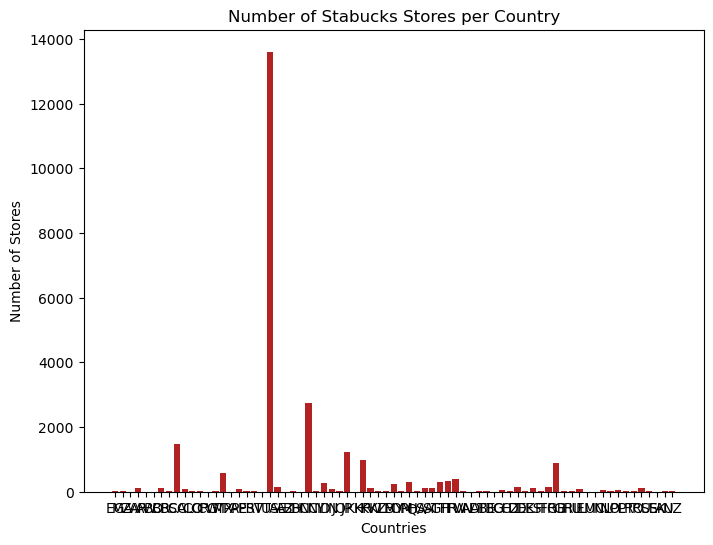

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(df2.country, df2.store_count, color="firebrick")
plt.title("Number of Starbucks Stores per Country")
plt.xlabel("Countries")
plt.ylabel("Number of Stores")
plt.show()

In [30]:
query = text("""SELECT
                region,
                country,
                COUNT(store_number) AS store_count
           FROM
                starbucks_store_locations
           GROUP BY
                region
           ORDER BY
               country ASC;""")
df_region = pd.read_sql(query, con=conn)
df_region

,region,country,store_count
0,Europe,AD,1872
1,Asia,AE,7493
2,Americas,AR,16142
3,Oceania,AU,46
4,Africa,EG,30


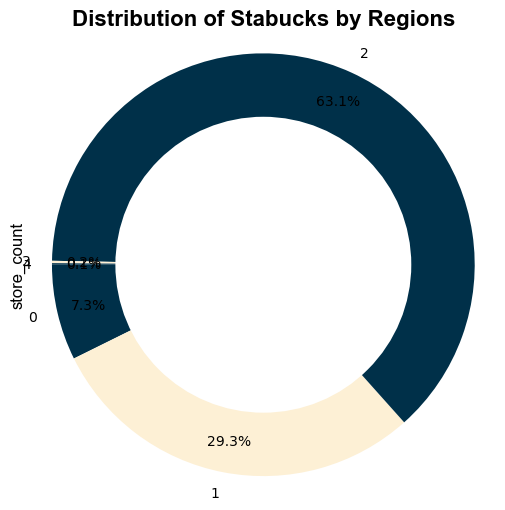

In [44]:
 # Data Viz Recipe
data=df_region
   
# Change Canvas Size
plt.figure(figsize=(6, 6))
    
# Create a basic plot
plt.pie(data.store_count, labels=data.index, colors=["#003049", "#fdf0d5"], autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85) 

# Add Labels/Title
plt.title("Distribution of Stabucks by Regions", fontweight="bold", fontsize=16, fontfamily="Arial")
#Label
plt.ylabel("store_count", fontfamily="Arial", fontsize=12)

# # Customizations (Just want to customize as DONUT as an extra Customizations to make it lookd prety by the folowwing additional lines)
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size for donut
plt.gca().add_artist(centre_circle)

# Set X/Y Limits
plt.axis("equal")

# Show/Save the Graph
plt.show()

In [46]:
query = text("""SELECT 
                store_number,
                country,
                longitude,
                latitude
            FROM 
                starbucks_store_locations 
            GROUP BY 
                state_province
            ORDER BY 
                state_province  ASC;""")
df3 = pd.read_sql(query, con=conn)
df3

,store_number,country,longitude,latitude
0,25078-237919,PH,121.00,14.44
1,27879-249085,CY,33.32,35.16
2,1832-138646,JP,138.74,36.34
3,22901-225145,CN,116.32,39.90
4,16292-169344,CN,117.21,39.14
...,...,...,...,...
331,15213-156884,ES,-0.56,38.29
332,32752-139185,MX,-102.57,22.78
333,40016-71169,CH,8.52,47.17
334,40019-95179,CH,8.56,47.30


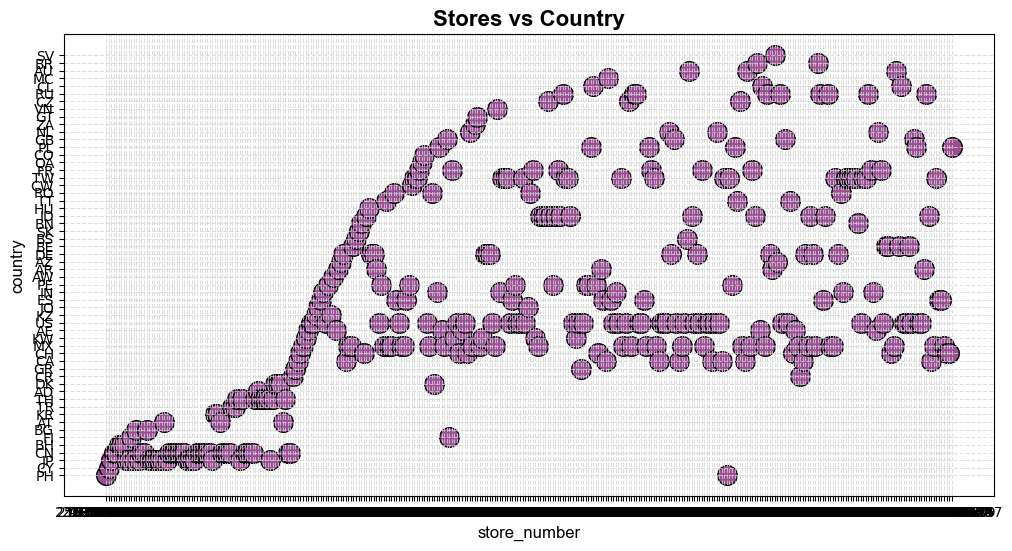

In [48]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df3.store_number, df3.country, color="#9A4C95", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("store_number", fontfamily="Arial", fontsize=12)
plt.ylabel("country", fontfamily="Arial", fontsize=12)
plt.title("Stores vs Country", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(150, 650)
# plt.xlim(11, 26)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

# Close Session

In [50]:
# Close Session
#session.close()
engine.dispose

<bound method Engine.dispose of Engine(sqlite:///starbucks_store_locations.sqlite)>